In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import yfinance as yf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime ,date
import warnings 
warnings.filterwarnings("ignore")

**ARIMA**

ARIMA - AUTOREGRESSIVE INTEGRATED MOVING AVERAGE

ARIMA models predict future values based on past values.

ARIMA makes use of lagged moving averages to smooth time series data.

ARIMA is widely used in technical analysis to forecast future security prices.

Autoregressive models firmly assumes that the future will resemble the past.

They can be proven inaccurate undert cetain market conditions, such as financial crises or periods of rapid technological change.

In [2]:
# downloading the data
df1 = yf.download("HDFCBANK.NS",end = "2023-02-04")
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,3.030000,3.030000,2.925,2.980000,2.389957,350000
1996-01-02,2.980000,3.025000,2.950,2.975000,2.385948,412000
1996-01-03,2.975000,2.995000,2.950,2.985000,2.393967,284000
1996-01-04,2.985000,2.980000,2.940,2.965000,2.377928,282000
1996-01-05,2.965000,2.980000,2.950,2.960000,2.373918,189000
...,...,...,...,...,...,...
2023-01-30,1595.000000,1625.300049,1582.000,1614.150024,1614.150024,9256411
2023-01-31,1619.699951,1622.699951,1595.000,1603.500000,1603.500000,9298122
2023-02-01,1624.000000,1665.000000,1606.000,1627.550049,1627.550049,8651395


<AxesSubplot:xlabel='Date'>

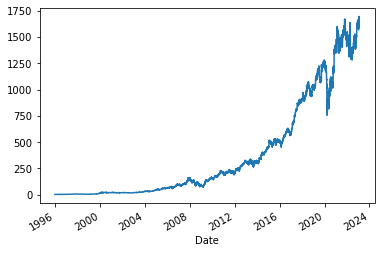

In [3]:
# ploting the data
df1["Adj Close"].plot()

In [4]:
df2 = df1[["Adj Close"]].copy()
df2

,Adj Close
Date,
1996-01-01,2.389957
1996-01-02,2.385948
1996-01-03,2.393967
1996-01-04,2.377928
1996-01-05,2.373918
...,...
2023-01-30,1614.150024
2023-01-31,1603.500000
2023-02-01,1627.550049


In [5]:
# setting the frequency to business day
df2.asfreq("d")

,Adj Close
Date,
1996-01-01,2.389957
1996-01-02,2.385948
1996-01-03,2.393967
1996-01-04,2.377928
1996-01-05,2.373918
...,...
2023-01-30,1614.150024
2023-01-31,1603.500000
2023-02-01,1627.550049


In [6]:

df2.asfreq("d").index

DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-06', '1996-01-07', '1996-01-08',
               '1996-01-09', '1996-01-10',
               ...
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03'],
              dtype='datetime64[ns]', name='Date', length=9896, freq='D')

In [7]:
df2.dropna()

,Adj Close
Date,
1996-01-01,2.389957
1996-01-02,2.385948
1996-01-03,2.393967
1996-01-04,2.377928
1996-01-05,2.373918
...,...
2023-01-30,1614.150024
2023-01-31,1603.500000
2023-02-01,1627.550049


In [8]:
# checking is there any null values in the time series 
df2.isnull().sum()

Adj Close    0
dtype: int64

In [9]:
# Calculating the orders we can consider for fitting the data into model
auto_arima(df2).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6817
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -25263.961
Date:                Fri, 17 Feb 2023   AIC                          50539.922
Time:                        23:27:21   BIC                          50580.884
Sample:                             0   HQIC                         50554.056
                               - 6817                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7766      0.004   -214.320      0.000      -0.784      -0.769
ar.L2         -0.6678      0.005   -134.606      0.000      -0.677      -0.658
ar.L3         -0.5128      0.006    -86.986      0.000      -0.524      -0.501
ar.L4         -0.3030      0.005    -55.347      0.000      -0.314      -0.292
ar.L5         -0.1000      0.005    -21.835      0.000      -0.109      -0.091
sigma2        97.2129      0.439    221.254      0.000      96.352      98.074
===================================================================================
Ljung-Box (L1) (Q):                   2.48   Jarque-Bera (JB):            236616.93
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):            1353.68   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
len(df2)

6817

In [11]:
#splitting the dataset into test and train
size = int(len(df2)*0.9)

df2_train = df2.iloc[:size]
df2_test = df2.iloc[size:]

In [12]:
df2_train

,Adj Close
Date,
1996-01-01,2.389957
1996-01-02,2.385948
1996-01-03,2.393967
1996-01-04,2.377928
1996-01-05,2.373918
...,...
2020-05-07,910.428223
2020-05-08,914.414490
2020-05-11,901.373230


In [13]:
df2_test

,Adj Close
Date,
2020-05-14,879.621338
2020-05-15,874.158813
2020-05-18,823.470093
2020-05-19,817.564575
2020-05-20,843.597900
...,...
2023-01-30,1614.150024
2023-01-31,1603.500000
2023-02-01,1627.550049


In [14]:
df2_test.iloc[0]

Adj Close    879.621338
Name: 2020-05-14 00:00:00, dtype: float64

In [15]:
df2_test.index

DatetimeIndex(['2020-05-14', '2020-05-15', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-26',
               '2020-05-27', '2020-05-28',
               ...
               '2023-01-20', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03'],
              dtype='datetime64[ns]', name='Date', length=682, freq=None)

In [16]:
df2_test.index[-1:][0]

Timestamp('2023-02-03 00:00:00')

In [17]:
# fitting ARIMA model
model = SARIMAX(df2_train,order=(5,2,0))

In [18]:
results = model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 6135
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -20131.013
Date:                Fri, 17 Feb 2023   AIC                          40274.027
Time:                        23:27:38   BIC                          40314.355
Sample:                             0   HQIC                         40288.016
                               - 6135                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8330      0.003   -294.958      0.000      -0.839      -0.827
ar.L2         -0.7396      0.004   -193.199      0.000      -0.747      -0.732
ar.L3         -0.5575      0.004   -133.716      0.000      -0.566      -0.549
ar.L4         -0.3331      0.004    -87.855      0.000      -0.340      -0.326
ar.L5         -0.0997      0.003    -32.783      0.000      -0.106      -0.094
sigma2        41.5416      0.137    303.516      0.000      41.273      41.810
===================================================================================
Ljung-Box (L1) (Q):                   2.90   Jarque-Bera (JB):           1146366.80
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):             827.29   Skew:                             1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        69.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
df2_train.tail()

,Adj Close
Date,
2020-05-07,910.428223
2020-05-08,914.414490
2020-05-11,901.373230
2020-05-12,887.347656
2020-05-13,913.036560


In [21]:
start_date = len(df2_train)
type(start_date)
#2022-06-23

int

In [22]:
start_date

6135

In [23]:
end_date =len(df2_train)+len(df2_test)-1
#2023-02-03
end_date

6816

In [24]:
end_date - start_date

681

In [25]:
# predicting the data 
predictions= results.predict(start=start_date,end=end_date,typ="levels")


In [26]:
predictions.index = df2.index[start_date:end_date+1]
predictions

Date
2020-05-14     913.051431
2020-05-15     908.800764
2020-05-18     906.977329
2020-05-19     907.471442
2020-05-20     911.208762
                 ...     
2023-01-30    1476.753240
2023-01-31    1477.594365
2023-02-01    1478.435490
2023-02-02    1479.276615
2023-02-03    1480.117740
Name: predicted_mean, Length: 682, dtype: float64

<AxesSubplot:xlabel='Date'>

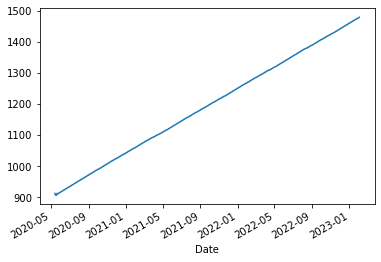

In [27]:
predictions.plot()

In [28]:
df2_test.tail()

,Adj Close
Date,
2023-01-30,1614.150024
2023-01-31,1603.500000
2023-02-01,1627.550049
2023-02-02,1603.349976
2023-02-03,1658.800049


<AxesSubplot:xlabel='Date'>

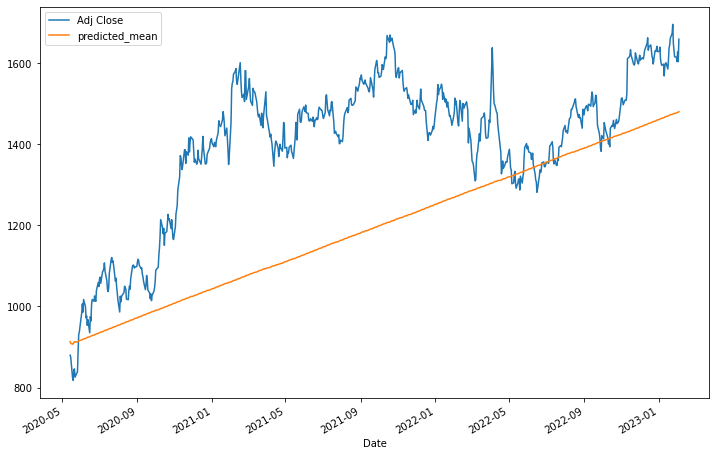

In [29]:
df2_test.plot(legend=True,figsize=(12,8))
predictions.plot(legend=True,figsize=(12,8))

In [33]:
# calculating RMSE of the model
from statsmodels.tools.eval_measures import rmse

error = rmse(df2_test["Adj Close"], predictions)
print(f'ARIMA(5,2,0) RMSE Error: {error:11.10}')

ARIMA(5,2,0) RMSE Error:   248.32602


In [34]:
df2_test.mean()

Adj Close    1397.73129
dtype: float64

In [35]:
predictions.mean()

1193.7199879122313

If we see  RMSE is 248 and mean of our test dataset is 1197 there is huge difference between Mean and RMSE. Prediction for HDFCBANK through ARIMA is not good prediction.

**Retrain the model on the full data and forecast the future**

In [36]:
model_1 = SARIMAX(df2,order=(5,2,0))
results_1 = model_1.fit()


In [37]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 6817
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -25263.961
Date:                Fri, 17 Feb 2023   AIC                          50539.922
Time:                        23:31:09   BIC                          50580.884
Sample:                             0   HQIC                         50554.056
                               - 6817                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7766      0.004   -214.320      0.000      -0.784      -0.769
ar.L2         -0.6678      0.005   -134.606      0.000      -0.677      -0.658
ar.L3         -0.5128      0.006    -86.986      0.000      -0.524      -0.501
ar.L4         -0.3030      0.005    -55.347      0.000      -0.314      -0.292
ar.L5         -0.1000      0.005    -21.835      0.000      -0.109      -0.091
sigma2        97.2129      0.439    221.254      0.000      96.352      98.074
===================================================================================
Ljung-Box (L1) (Q):                   2.48   Jarque-Bera (JB):            236616.93
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):            1353.68   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
df2

,Adj Close
Date,
1996-01-01,2.389957
1996-01-02,2.385948
1996-01-03,2.393967
1996-01-04,2.377928
1996-01-05,2.373918
...,...
2023-01-30,1614.150024
2023-01-31,1603.500000
2023-02-01,1627.550049


In [39]:
len(df2)

6817

In [49]:
index_futures_dates = pd.date_range(start="2023-02-04" ,end = "2023-02-13" )


predictions_1= results_1.predict(start=len(df2),end=len(df2)+9,typ="level")
#redictions_1                    

predictions_1.index = index_futures_dates

predictions_1.asfreq("b")
print(predictions_1.index)

DatetimeIndex(['2023-02-04', '2023-02-05', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-11',
               '2023-02-12', '2023-02-13'],
              dtype='datetime64[ns]', freq='D')


In [55]:
predictions_1 = predictions_1.asfreq("b")

In [56]:
predictions_1 


2023-02-06    1682.796243
2023-02-07    1695.989648
2023-02-08    1711.466261
2023-02-09    1726.357489
2023-02-10    1737.564268
2023-02-13    1776.111083
Freq: B, Name: predicted_mean, dtype: float64

In [57]:
# downloading the data
df3 = yf.download("HDFCBANK.NS",start = "2023-02-04",end = "2023-02-14")["Adj Close"]
df3

[*********************100%***********************]  1 of 1 completed


Date
2023-02-06    1651.750000
2023-02-07    1654.199951
2023-02-08    1654.000000
2023-02-09    1650.550049
2023-02-10    1657.099976
2023-02-13    1658.349976
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

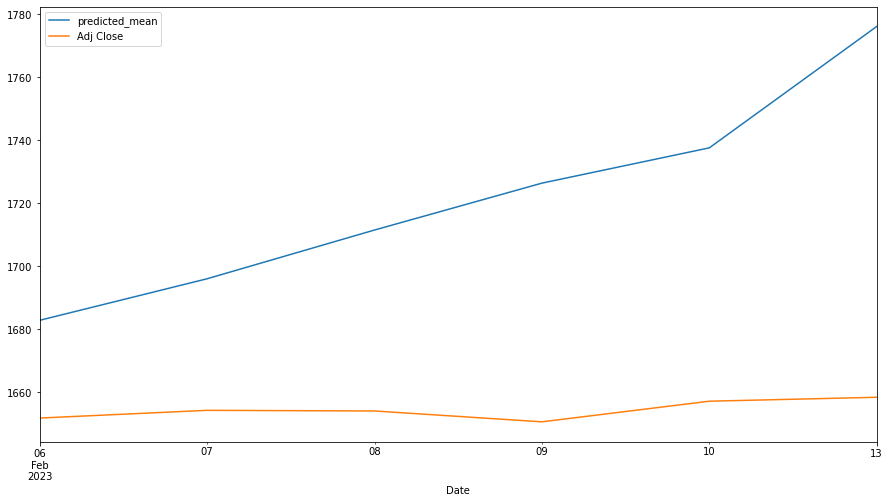

In [58]:
predictions_1.plot(legend=True,figsize=(15,8))
df3.plot(legend=True,figsize=(15,8))

In [59]:
error = rmse(df3, predictions_1)
print(f'ARIMA(5,1,4) RMSE Error: {error:11.10}')


ARIMA(5,1,4) RMSE Error: 73.14548047


In [60]:
# MEAN OF NEW PREDICTED DATA
predictions_1.mean()


1721.7141653532617

In [48]:
# MEAN OF NEW DATA start = "2023-02-04",end = "2023-02-14" OF HDFCBANK
df3.mean()

1654.3249918619792